In [29]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

The goal of this homework is to create a regression model for predicting the performance of students on a standardized test (column 'JAMB_Score').

In [2]:
df = pd.read_csv("jamb_exam_results.csv")

In [3]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [4]:
df.head()

,jamb_score,study_hours_per_week,attendance_rate,teacher_quality,distance_to_school,school_type,school_location,extra_tutorials,access_to_learning_materials,parent_involvement,it_knowledge,student_id,age,gender,socioeconomic_status,parent_education_level,assignments_completed
0,192,22,78,4,12.4,Public,Urban,Yes,Yes,High,Medium,1,17,Male,Low,Tertiary,2
1,207,14,88,4,2.7,Public,Rural,No,Yes,High,High,2,15,Male,High,NaN,1
2,182,29,87,2,9.6,Public,Rural,Yes,Yes,High,Medium,3,20,Female,High,Tertiary,2
3,210,29,99,2,2.6,Public,Urban,No,Yes,Medium,High,4,22,Female,Medium,Tertiary,1
4,199,12,98,3,8.8,Public,Urban,No,Yes,Medium,Medium,5,22,Female,Medium,Tertiary,1


In [5]:
df = df.drop(['student_id'], axis=1)

In [6]:
df.isnull().sum()

jamb_score                        0
study_hours_per_week              0
attendance_rate                   0
teacher_quality                   0
distance_to_school                0
school_type                       0
school_location                   0
extra_tutorials                   0
access_to_learning_materials      0
parent_involvement                0
it_knowledge                      0
age                               0
gender                            0
socioeconomic_status              0
parent_education_level          891
assignments_completed             0
dtype: int64

In [7]:
df = df.fillna(0)

In [8]:
df.dtypes

jamb_score                        int64
study_hours_per_week              int64
attendance_rate                   int64
teacher_quality                   int64
distance_to_school              float64
school_type                      object
school_location                  object
extra_tutorials                  object
access_to_learning_materials     object
parent_involvement               object
it_knowledge                     object
age                               int64
gender                           object
socioeconomic_status             object
parent_education_level           object
assignments_completed             int64
dtype: object

In [9]:
# Do train/validation/test split with 60%/20%/20% distribution
from sklearn.model_selection import train_test_split

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [10]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [11]:
y_train = df_train.jamb_score.values
y_val = df_val.jamb_score.values
y_test = df_test.jamb_score.values

In [12]:
y_train

array([145, 231, 161, ..., 216, 234, 103])

In [13]:
del df_train['jamb_score']
del df_val['jamb_score']
del df_test['jamb_score']

In [14]:
# Use DictVectorizer(sparse=True) to turn the dataframes into matrices

# Question 1
Let's train a decision tree regressor to predict the jamb_score variable.

Train a model with max_depth=1.
Which feature is used for splitting the data?
* study_hours_per_week
* attendance_rate
* teacher_quality
* distance_to_school

In [15]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score
from sklearn.tree import export_text

In [16]:
train_dicts = df_train.fillna(0).to_dict(orient='records')

In [17]:
train_dicts[0]

{'study_hours_per_week': 20,
 'attendance_rate': 72,
 'teacher_quality': 3,
 'distance_to_school': 4.4,
 'school_type': 'Public',
 'school_location': 'Urban',
 'extra_tutorials': 'No',
 'access_to_learning_materials': 'Yes',
 'parent_involvement': 'Medium',
 'it_knowledge': 'Low',
 'age': 21,
 'gender': 'Female',
 'socioeconomic_status': 'Low',
 'parent_education_level': 0,
 'assignments_completed': 3}

In [18]:
dv = DictVectorizer(sparse=True)
X_train = dv.fit_transform(train_dicts)

In [44]:
X_train[0]

<1x29 sparse matrix of type '<class 'numpy.float64'>'
	with 15 stored elements in Compressed Sparse Row format>

In [20]:
dt = DecisionTreeRegressor(max_depth=1)
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=1)

In [21]:
val_dicts = df_val.fillna(0).to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [22]:
y_pred = dt.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)
# it is a regression problem! :)

AttributeError: 'DecisionTreeRegressor' object has no attribute 'predict_proba'

In [23]:
print(export_text(dt, feature_names=list(dv.get_feature_names_out())))

|--- study_hours_per_week <= 18.50
|   |--- value: [155.24]
|--- study_hours_per_week >  18.50
|   |--- value: [188.59]



# Question 2
Train a random forest regressor with these parameters:

* n_estimators=10
* random_state=1
* n_jobs=-1 (optional - to make training faster)

What's the RMSE of this model on the validation data?

* 22.13, 42.13, 62.13, 82.12


In [24]:
from sklearn.ensemble import RandomForestRegressor

In [25]:
rf = RandomForestRegressor(n_estimators=10, random_state=1, n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, n_jobs=-1, random_state=1)

In [26]:
y_pred = rf.predict(X_val)
# roc_auc_score(y_val, y_pred)
# it is a regression problem :)

In [27]:
y_pred

array([234.7, 145. , 195.2, 139.4, 196.8, 249.9, 222.5, 211.1, 164.3,
       222.9, 201.2, 172.5, 189. , 202.7, 169.9, 138.8, 160.9, 131.7,
       179.5, 128.3, 189.1, 139.1, 198.2, 194.2, 215.5, 183.6, 160.2,
       154.9, 140.9, 147.4, 189.8, 218.6, 140.6, 163.9, 222. , 140. ,
       150.4, 191.1, 165.1, 168.1, 180.4, 142.7, 191.9, 150.8, 121.9,
       154.8, 182.1, 194.1, 148.9, 197.3, 145.2, 157.5, 158.4, 226.7,
       262.6, 230.2, 177.6, 152.2, 157.5, 150.5, 199.2, 160.1, 143.5,
       157.2, 141.2, 209.1, 260.3, 178.4, 198.5, 149.3, 186.3, 148.4,
       199.4, 160.4, 163.3, 149.3, 280.7, 156.5, 167.4, 197.2, 220.4,
       189.2, 141.1, 179.7, 201.8, 145. , 186.3, 131.9, 162.8, 160.7,
       160.6, 160.6, 162.1, 158.4, 151.3, 126.2, 147.6, 176.8, 180.7,
       171.8, 134. , 204.4, 192.5, 195.5, 164.9, 174.8, 177.3, 132.1,
       207.6, 126.8, 186.4, 175.9, 184.8, 155.3, 253.3, 145.3, 220.3,
       168.4, 204.2, 160.7, 137.7, 144.7, 155.4, 133.7, 228.5, 171.5,
       170. , 202.2,

In [28]:
from sklearn.metrics import root_mean_squared_error

root_mean_squared_error(y_val, y_pred)

42.13724207871227

# Question 3
Now let's experiment with the n_estimators parameter

* Try different values of this parameter from 10 to 200 with step 10.
* Set random_state to 1.
* Evaluate the model on the validation dataset.

After which value of n_estimators does RMSE stop improving? Consider 3 decimal places for calculating the answer.

* 10, 25, 80, 200

In [30]:
scores = []

for n in range(10, 201, 10):
    rf = RandomForestRegressor(n_estimators=n, random_state=1, n_jobs=-1)
    rf.fit(X_train, y_train)
    
    y_pred = rf.predict(X_val)
    rmse = root_mean_squared_error(y_val, y_pred)
    
    scores.append((n, round(rmse, 3)))

In [31]:
df_scores = pd.DataFrame(scores, columns=['n_estimators', 'rmse'])

In [32]:
df_scores

,n_estimators,rmse
0,10,42.137
1,20,41.461
2,30,41.106
3,40,40.917
4,50,40.852
5,60,40.784
6,70,40.677
7,80,40.539
8,90,40.504
9,100,40.517


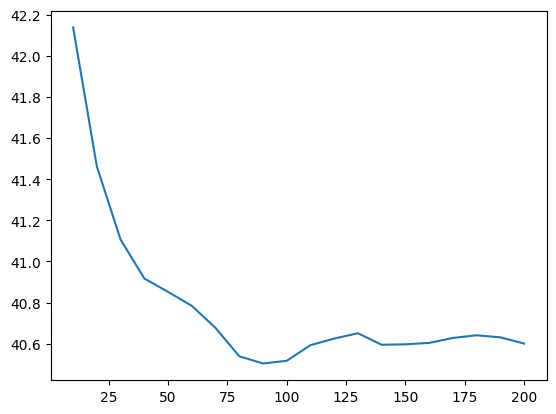

In [33]:
plt.plot(df_scores.n_estimators, df_scores.rmse)

# Question 4
Let's select the best max_depth:

* Try different values of max_depth: [10, 15, 20, 25]
* For each of these values, try different values of n_estimators from 10 till 200 (with step 10), calculate the mean RMSE
* Fix the random seed: random_state=1

What's the best max_depth, using the mean RMSE?

* 10, 15, 20, 25

In [34]:
scores = []

for d in [10, 15, 20, 25]:
    for n in range(10, 201, 10):
        
        rf = RandomForestRegressor(n_estimators=n, 
                                   max_depth=d, 
                                   random_state=1)
        rf.fit(X_train, y_train)
    
        y_pred = rf.predict(X_val)
        rmse = root_mean_squared_error(y_val, y_pred)
    
        scores.append((d, n, round(rmse, 3)))

In [35]:
columns = ['max_depth', 'n_estimators', 'rmse']
df_scores = pd.DataFrame(scores, columns=columns)

In [36]:
df_scores

,max_depth,n_estimators,rmse
0,10,10,41.258
1,10,20,40.881
2,10,30,40.625
3,10,40,40.270
4,10,50,40.317
...,...,...,...
75,25,160,40.600
76,25,170,40.624
77,25,180,40.639
78,25,190,40.629


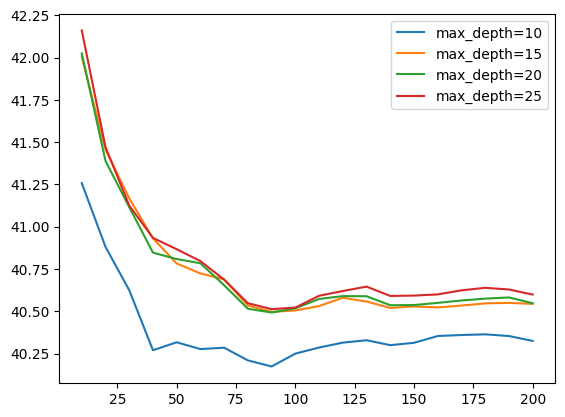

In [37]:
for d in [10, 15, 20, 25]:
    df_subset = df_scores[df_scores.max_depth == d]
    
    plt.plot(df_subset.n_estimators, df_subset.rmse,
             label='max_depth=%d' % d)

plt.legend()

# Question 5

We can extract feature importance information from tree-based models.

At each step of the decision tree learning algorithm, it finds the best split. When doing it, we can calculate "gain" - the reduction in impurity before and after the split. This gain is quite useful in understanding what are the important features for tree-based models.

In Scikit-Learn, tree-based models contain this information in the feature_importances_ field.

For this homework question, we'll find the most important feature:
* Train the model with these parameters: n_estimators=10, max_depth=20, random_state=1, n_jobs=-1 (optional)
* Get the feature importance information from this model

What's the most important feature (among these 4)?
* study_hours_per_week, attendance_rate, distance_to_school, teacher_quality

In [38]:
rf = RandomForestRegressor(n_estimators=10, 
                           max_depth=20, 
                           random_state=1, 
                           n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, n_estimators=10, n_jobs=-1, random_state=1)

In [39]:
importances = rf.feature_importances_

In [40]:
importances

array([0.0123254 , 0.01026189, 0.06931145, 0.03151679, 0.14972903,
       0.1364858 , 0.01345934, 0.00913136, 0.00928871, 0.01038263,
       0.01771934, 0.01240405, 0.00914148, 0.        , 0.01545036,
       0.01695692, 0.01448862, 0.02291885, 0.01335761, 0.01149201,
       0.00955909, 0.00923932, 0.0089532 , 0.00840598, 0.02571426,
       0.01070798, 0.01056268, 0.24835361, 0.08268222])

In [50]:
sorted(zip(rf.feature_importances_, dv.get_feature_names_out()), reverse=True)

[(0.24835361199396533, 'study_hours_per_week'),
 (0.1497290297846747, 'attendance_rate'),
 (0.13648580486323686, 'distance_to_school'),
 (0.08268222263880161, 'teacher_quality'),
 (0.06931145469695398, 'age'),
 (0.0315167894546007, 'assignments_completed'),
 (0.025714264343587152, 'socioeconomic_status=High'),
 (0.022918852929064194, 'parent_involvement=High'),
 (0.0177193420394119, 'it_knowledge=High'),
 (0.016956919815100068, 'parent_education_level=Secondary'),
 (0.015450360187928142, 'parent_education_level=Primary'),
 (0.014488617277194152, 'parent_education_level=Tertiary'),
 (0.013459336291731936, 'extra_tutorials=No'),
 (0.013357613537934169, 'parent_involvement=Low'),
 (0.012404050525957139, 'it_knowledge=Low'),
 (0.012325395818561706, 'access_to_learning_materials=No'),
 (0.011492011642547156, 'parent_involvement=Medium'),
 (0.01070797746168863, 'socioeconomic_status=Low'),
 (0.010562682989822825, 'socioeconomic_status=Medium'),
 (0.010382634572648446, 'gender=Male'),
 (0.010

# Question 6
Now let's train an XGBoost model! For this question, we'll tune the eta parameter:

* Install XGBoost
* Create DMatrix for train and validation
* Create a watchlist
* Train a model with these parameters for 100 rounds:

In [51]:
import xgboost as xgb

In [64]:
features = list(dv.get_feature_names_out())
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [72]:
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [73]:
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

In [74]:
%%capture output

model_03 = xgb.train(xgb_params, dtrain, num_boost_round=100,
                  verbose_eval=5, evals=watchlist)

In [75]:
def parse_xgb_output(output):
    results = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        results.append((it, train, val))
    
    columns = ['num_iter', 'train_rmse', 'val_rmse']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results

In [76]:
df_score = parse_xgb_output(output)

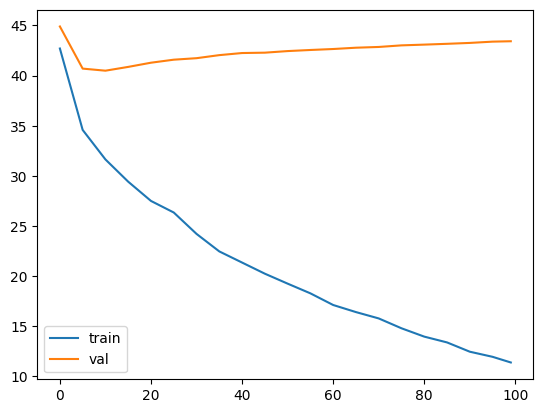

In [77]:
plt.plot(df_score.num_iter, df_score.train_rmse, label='train')
plt.plot(df_score.num_iter, df_score.val_rmse, label='val')
plt.legend()

Now change eta from 0.3 to 0.1.

Which eta leads to the best RMSE score on the validation dataset?

* 0.3, 0.1, Both give equal value

In [78]:
xgb_params = {
    'eta': 0.1, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

In [79]:
%%capture output

model_01 = xgb.train(xgb_params, dtrain, num_boost_round=100,
                  verbose_eval=5, evals=watchlist)

In [80]:
df_score = parse_xgb_output(output)

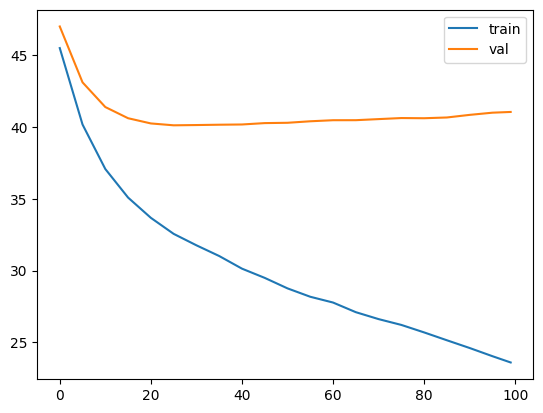

In [81]:
plt.plot(df_score.num_iter, df_score.train_rmse, label='train')
plt.plot(df_score.num_iter, df_score.val_rmse, label='val')
plt.legend()